In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle

In [18]:
def get_data():
    df = pd.read_csv("ecommerce_data.csv")
    data = df.values
    
    # shuffle it
    np.random.shuffle(data)
    
    # split features and labels
    X = data[:, :-1]  # Y is the last column
    Y = data[:, -1]
    
    # one-hot encode the categorical data
    # create a new matrix of zeroes X2 with the correct number of columns
    N, D = X.shape   # (100,5)
    X2 = np.zeros((N, D+3))  # (100,8)
    X2[:,0:(D-1)] = X[:,0:(D-1)] # first 3 cols of X2 are equivalent to first 3 cols of X  
    
    # one-hot for "is returning visitor", either 0 or 1
    for n in range(N):
        temp = int(X[n,D-1])  # 0, 1, 2, or 3
        # assigning 1 to either 4th, 5th, 6th, or 7th column (which are 5,6,7,8)
        X2[n,temp + D-1] = 1  # X2[n,D]=1 if temp=1, or X2[n,D-1]=1 if temp=0
    
    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest

In [19]:
def get_binary_data():
    # return only the data from the first 2 classes
    Xtrain, Ytrain, Xtest, Ytest = get_data()
    X2train = Xtrain[Ytrain <= 1]
    Y2train = Ytrain[Ytrain <= 1]
    X2test = Xtest[Ytest <= 1]
    Y2test = Ytest[Ytest <= 1]
    return X2train, Y2train, X2test, Y2test

0 1.7087421559212463 1.791523225956435
1000 0.19444829627666776 0.14734118414694855
2000 0.19378017785199178 0.14408412044406832
3000 0.19374279911188594 0.14338538564692405
4000 0.19374028231223916 0.14321039944974037
5000 0.1937401057478837 0.14316454899658396
6000 0.19374009322949806 0.14315237813411064
7000 0.1937400923394611 0.1431491356762269
8000 0.1937400922761338 0.14314827098406774
9000 0.19374009227162692 0.1431480403266244
Final train classification_rate: 0.9681528662420382
Final test classification_rate: 0.9642857142857143


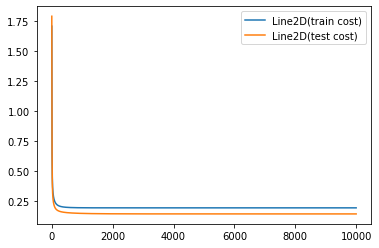

In [20]:
# get the data
Xtrain, Ytrain, Xtest, Ytest = get_binary_data()

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

# calculate the accuracy
def classification_rate(Y, P):
    # true results / total results
    return np.mean(Y == P)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()